In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.2 MB/s eta 0:00:00


In [3]:
import cv2

In [4]:
#Loading Dataset:
!pip install -q kaggle


In [5]:
%mkdir dataset
%mkdir dataset/images # for source images
%mkdir dataset/masks # for annotation masks
%mkdir dataset/test # for test images
%mkdir dataset/temp # temp storage

In [6]:
# start the download, get from google drive
!kaggle datasets download 'nikhilpandey360/chest-xray-masks-and-labels'

Dataset URL: https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels
License(s): CC0-1.0
100% 9.57G/9.58G [01:45<00:00, 128MB/s]
100% 9.58G/9.58G [01:45<00:00, 97.1MB/s]


In [8]:
#move the zip file to my google drive
#first mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!unzip chest-xray-masks-and-labels.zip -d dataset/temp/

Archive:  chest-xray-masks-and-labels.zip
  inflating: dataset/temp/Lung Segmentation/.ipynb_checkpoints/Montgomery-checkpoint.ipynb  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0001_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0002_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0003_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0004_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0005_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0006_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0007_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0008_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0009_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0010_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0011_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0012_0.png  
 

In [10]:
%ls dataset/temp/Lung\ Segmentation

ClinicalReadings/  masks/                       NLM-MontgomeryCXRSet-ReadMe.pdf
CXR_png/           NLM-ChinaCXRSet-ReadMe.docx  test/


In [11]:
%mv dataset/temp/Lung\ Segmentation/CXR_png/* dataset/images/
IMAGE_PATH = "/content/dataset/images/"

In [12]:
%mv dataset/temp/Lung\ Segmentation/CXR_png/* dataset/masks/
MASK_PATH = '/content/dataset/masks/'
%mv dataset/temp/Lung\ Segmentation/CXR_png/* dataset/test/
TEST_PATH = '/content/dataset/test/'

mv: cannot stat 'dataset/temp/Lung Segmentation/CXR_png/*': No such file or directory
mv: cannot stat 'dataset/temp/Lung Segmentation/CXR_png/*': No such file or directory


In [13]:
%mkdir /content/transformed_images

In [14]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

image_dir = '/content/dataset/images'  # Path to your images folder
output_dir = '/content/dataset/transformed_images'  # Where to save the transformed components
os.makedirs(output_dir, exist_ok=True)

num=40

image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])[:num]

In [15]:
%mv dataset/temp/Lung\ Segmentation/masks/* dataset/masks/
MASK_PATH = '/content/dataset/masks/'
MASK_PATH = '/content/dataset/masks/'
TEST_PATH = '/content/dataset/test/'

In [16]:
# importing os module
import os

# suffix cropping function
def rchop(s, suffix):
    if suffix and s.endswith(suffix):
        return s[:-len(suffix)]
    return s

suffix = "_mask.png"

# iterate over all mask images and edit the file-names
for count, filename in enumerate(os.listdir("/content/dataset/masks")):
  src = "/content/dataset/masks/" + filename
  res = rchop(src, suffix)
  dst = ""
  if src != res:
    dst = rchop(src, suffix) + ".png"
    os.rename(src, dst)

In [17]:
# check the number of files in the images/ and masks/ directories
import os.path

print("number of files in images/ directory: " + str(len([name for name in os.listdir("/content/dataset/images/")])))
print("number of files in masks/ directory: " + str(len([name for name in os.listdir("/content/dataset/masks/")])))


number of files in images/ directory: 800
number of files in masks/ directory: 704


In [18]:
# function to confirm the existence of a file in a given directory
def searchFile(fileName, TARGET_PATH):
  for root, dirs, files in os.walk(TARGET_PATH):
    for Files in files:
      #print(Files)
      found = Files.find(fileName)
      if found != -1:
        break
  return found

In [19]:
%mkdir /content/dataset/orphan_images

In [20]:
# clean up the images/ directory by removing all images that do not have a mask
import shutil

cnt = 0

for count, filename in enumerate(os.listdir("/content/dataset/images")):
  found = searchFile(filename, MASK_PATH)
  if found == -1:
    cnt = cnt + 1
    src = "/content/dataset/images/" + filename
    dst = "/content/dataset/orphan_images/" + filename
    dest = shutil.move(src, dst)
print("number of files not matched: " + str(cnt))

number of files not matched: 96


In [21]:
# confirm consistency
print("number of files in images/ directory: " + str(len([name for name in os.listdir("/content/dataset/images/")])))
print("number of files in masks/ directory: " + str(len([name for name in os.listdir("/content/dataset/masks/")])))

number of files in images/ directory: 704
number of files in masks/ directory: 704


Make proper accurate splits of data

In [22]:
import os
import shutil
import random

# Assuming the previous code has already been executed, and the following directories are set up:
IMAGE_PATH = '/content/dataset/images/'
MASK_PATH = '/content/dataset/masks/'
TEST_PATH = '/content/dataset/test/'

# Create the test directory if it doesn't exist
os.makedirs(TEST_PATH, exist_ok=True)

# Get all image filenames
all_images = sorted([f for f in os.listdir(IMAGE_PATH) if f.endswith('.png')])

# Calculate 10% for the test split
num_test = int(len(all_images) * 0.2)

# Randomly select 10% of the dataset for testing
test_indices = random.sample(range(len(all_images)), num_test)

# Move selected images to the test directory
for idx in test_indices:
    src = os.path.join(IMAGE_PATH, all_images[idx])
    dst = os.path.join(TEST_PATH, all_images[idx])
    shutil.move(src, dst)

print(f"Moved {num_test} images to the test directory: {TEST_PATH}")

# Check the number of files in the test directory
print("Number of files in the test directory: " + str(len(os.listdir(TEST_PATH))))

Moved 140 images to the test directory: /content/dataset/test/
Number of files in the test directory: 140


In [23]:
# Create the test_masks directory if it doesn't exist
TEST_MASKS_PATH = '/content/dataset/test_masks/'
os.makedirs(TEST_MASKS_PATH, exist_ok=True)

# Move corresponding masks to the test_masks directory
for idx in test_indices:
    # Get the filename of the image that was moved
    image_filename = all_images[idx]

    # The mask filename is the same as the image filename
    mask_filename = image_filename  # No changes needed to the filename
    src_mask = os.path.join(MASK_PATH, mask_filename)

    # Print debug information
    print(f"Checking for mask: {mask_filename}")
    print(f"Source mask path: {src_mask}")

    # Check if the corresponding mask exists before moving
    if os.path.exists(src_mask):
        dst_mask = os.path.join(TEST_MASKS_PATH, mask_filename)
        shutil.move(src_mask, dst_mask)
    else:
        print(f"Mask not found for image: {image_filename}")

# Check the number of files in the test_masks directory
print("Number of masks in the test_masks directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Checking for mask: CHNCXR_0032_0.png
Source mask path: /content/dataset/masks/CHNCXR_0032_0.png
Checking for mask: MCUCXR_0316_1.png
Source mask path: /content/dataset/masks/MCUCXR_0316_1.png
Checking for mask: CHNCXR_0110_0.png
Source mask path: /content/dataset/masks/CHNCXR_0110_0.png
Checking for mask: CHNCXR_0136_0.png
Source mask path: /content/dataset/masks/CHNCXR_0136_0.png
Checking for mask: CHNCXR_0146_0.png
Source mask path: /content/dataset/masks/CHNCXR_0146_0.png
Checking for mask: CHNCXR_0374_1.png
Source mask path: /content/dataset/masks/CHNCXR_0374_1.png
Checking for mask: CHNCXR_0648_1.png
Source mask path: /content/dataset/masks/CHNCXR_0648_1.png
Checking for mask: CHNCXR_0331_1.png
Source mask path: /content/dataset/masks/CHNCXR_0331_1.png
Checking for mask: CHNCXR_0169_0.png
Source mask path: /content/dataset/masks/CHNCXR_0169_0.png
Checking for mask: CHNCXR_0035_0.png
Source mask path: /content/dataset/masks/CHNCXR_0035_0.png
Checking for mask: MCUCXR_0024_0.png
Sou

In [24]:
print("Number of files in the mask directory: " + str(len(os.listdir(MASK_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(IMAGE_PATH))))

Number of files in the mask directory: 564
Number of files in the train_image directory: 564


Testing PyWavelet Transformations

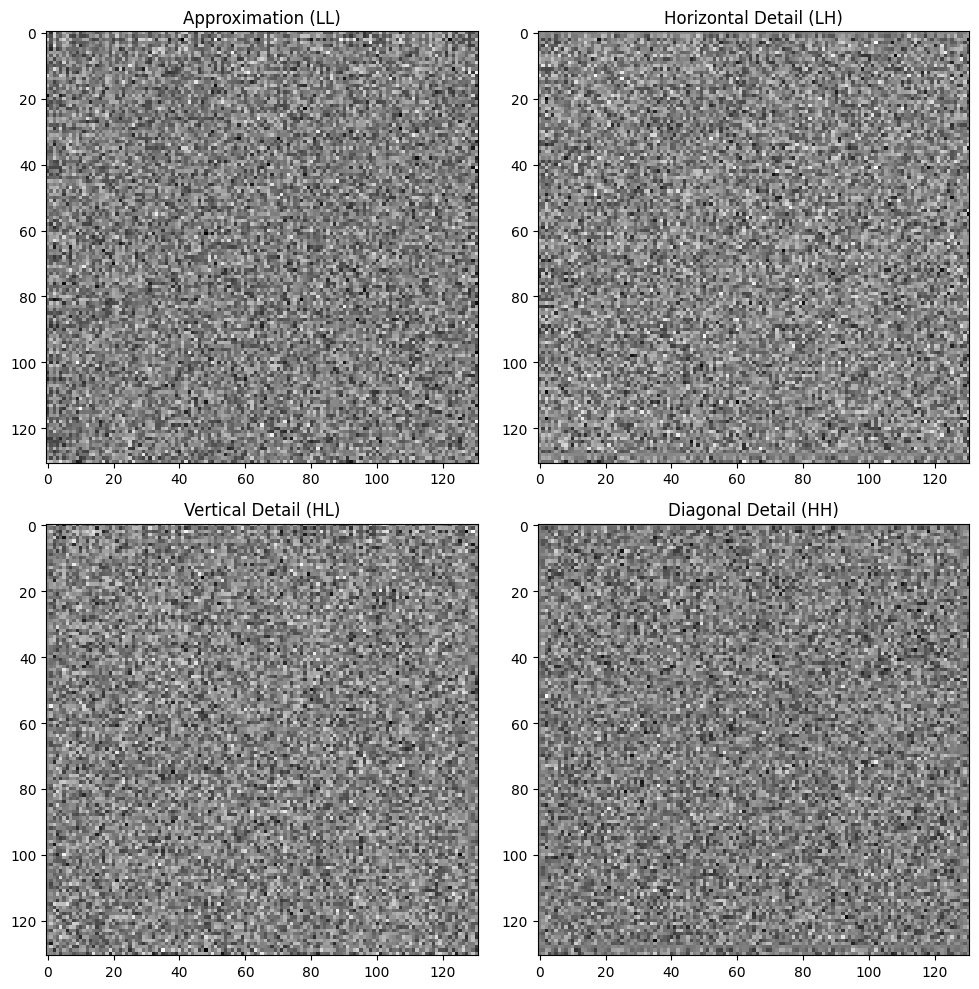

In [25]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample 2D array (image-like) for demonstration
data = np.random.rand(256, 256)

# Perform 2D Discrete Wavelet Transform using the Daubechies 4 (db4) wavelet
coeffs2 = pywt.dwt2(data, 'db4')

# The result of dwt2 is a tuple containing (LL, (LH, HL, HH))
LL, (LH, HL, HH) = coeffs2

# Plot the original and transformed coefficients
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')

plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal Detail (LH)')

plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Vertical Detail (HL)')

plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal Detail (HH)')

plt.tight_layout()
plt.show()

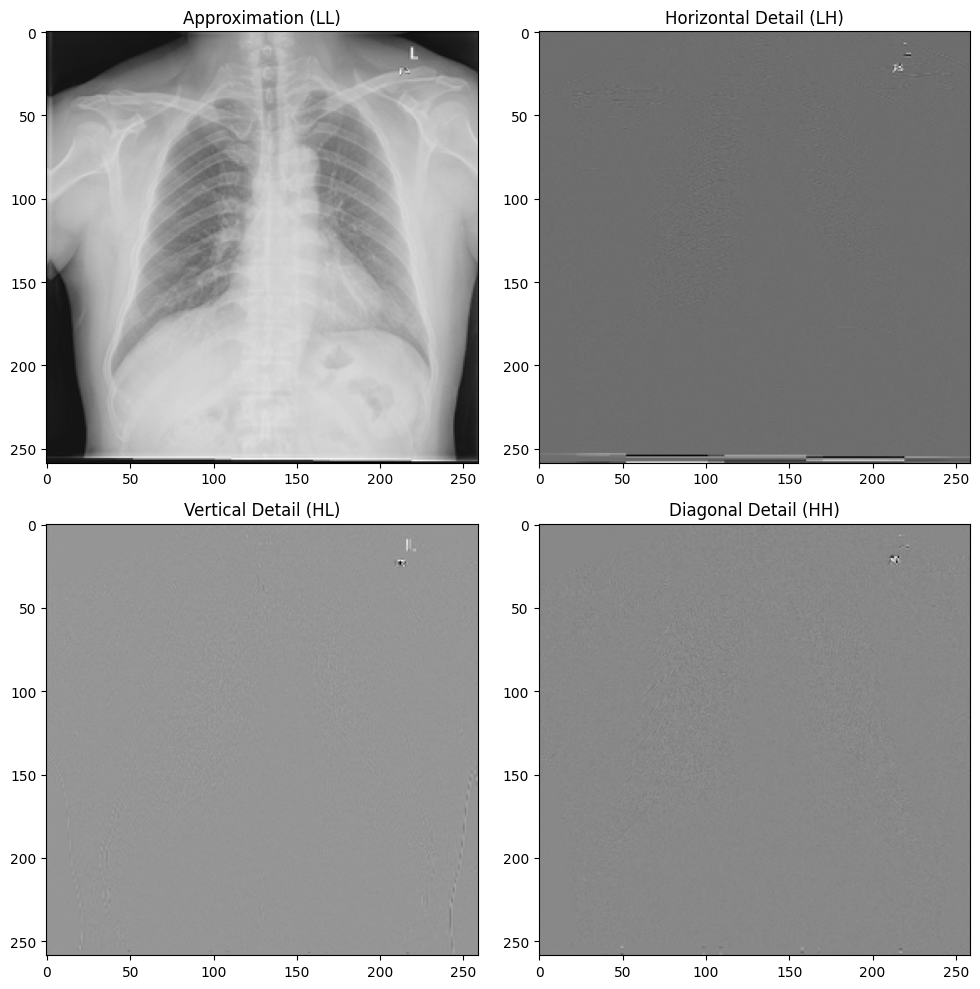

In [26]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Function to load and preprocess image
def load_image(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (512,512))

    # Normalize the image data (optional but helps with numerical stability)
    img = img / 255.0

    return img

# Function to perform 2D wavelet transform and plot components
def perform_wavelet_transform(image):
    # Perform 2D Discrete Wavelet Transform using the Daubechies 4 (db4) wavelet
    coeffs2 = pywt.dwt2(image, 'db4')

    # The result of dwt2 is a tuple containing (LL, (LH, HL, HH))
    LL, (LH, HL, HH) = coeffs2

    # Plot the original and transformed coefficients
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(LL, cmap='gray')
    plt.title('Approximation (LL)')

    plt.subplot(2, 2, 2)
    plt.imshow(LH, cmap='gray')
    plt.title('Horizontal Detail (LH)')

    plt.subplot(2, 2, 3)
    plt.imshow(HL, cmap='gray')
    plt.title('Vertical Detail (HL)')

    plt.subplot(2, 2, 4)
    plt.imshow(HH, cmap='gray')
    plt.title('Diagonal Detail (HH)')

    plt.tight_layout()
    plt.show()

image_path = '/content/dataset/images/CHNCXR_0001_0.png'

image = load_image(image_path)

perform_wavelet_transform(image)

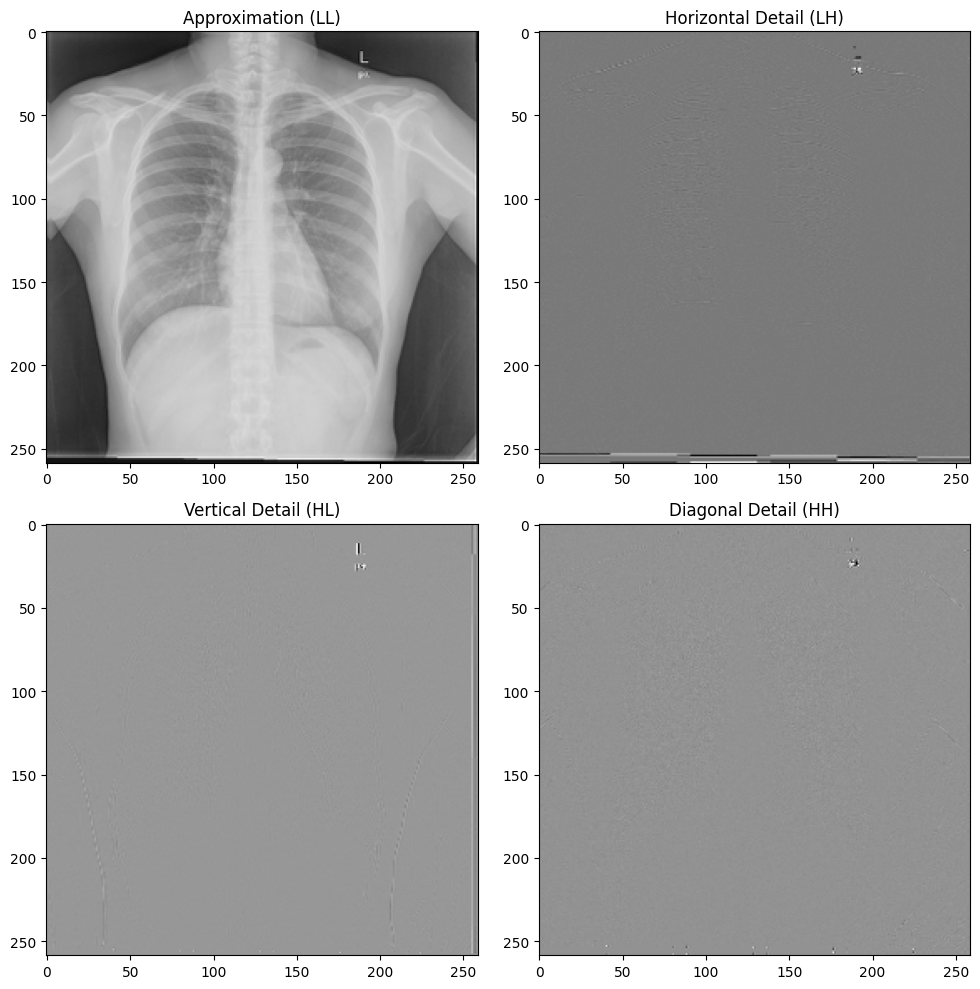

In [27]:
# Test images in our dataset
image_path = '/content/dataset/images/CHNCXR_0003_0.png'

# Load the image
image = load_image(image_path)

# Perform wavelet transform and plot the components
perform_wavelet_transform(image)

**Data Generator:**

In [28]:
import os
import numpy as np
import pywt
import cv2
import tensorflow as tf

class WaveletDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_folder, mask_folder, file_list, batch_size, image_size=(512,512), wavelet='db4'):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.file_list = file_list
        self.batch_size = batch_size
        self.image_size = image_size
        self.wavelet = wavelet

    def __len__(self):
        return int(np.ceil(len(self.file_list) / self.batch_size))

    def __getitem__(self, index):
        batch_files = self.file_list[index * self.batch_size:(index + 1) * self.batch_size]

        images = np.zeros((len(batch_files), self.image_size[0], self.image_size[1], 4))
        masks = np.zeros((len(batch_files), self.image_size[0], self.image_size[1], 1))

        for i, filename in enumerate(batch_files):
            img_path = os.path.join(self.image_folder, filename)
            mask_path = os.path.join(self.mask_folder, filename)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                raise ValueError(f"Error loading image from {img_path}")
            img = cv2.resize(img, self.image_size) / 255.0

            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                raise ValueError(f"Error loading mask from {mask_path}")
            mask = cv2.resize(mask, self.image_size) / 255.0
            mask = np.expand_dims(mask, axis=-1)

            coeffs2 = pywt.dwt2(img, self.wavelet)
            LL, (LH, HL, HH) = coeffs2

            wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)
            wavelet_image = cv2.resize(wavelet_image, self.image_size)

            images[i] = wavelet_image
            masks[i] = mask

        return images, masks

Comparing Pywavelleted UNet And Normal UNet Metrics

In [42]:
#test on a few images:

In [37]:
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K

# First define your dice loss function exactly as you had it before
def dice_loss(y_true, y_pred):
    smooth = 1e-6
    intersection = K.sum(y_true * y_pred)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth)

# Then load the model with the custom loss function
model = load_model(model_path, custom_objects={'dice_loss': dice_loss})

Preprocessed image shape: (1, 512, 512, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


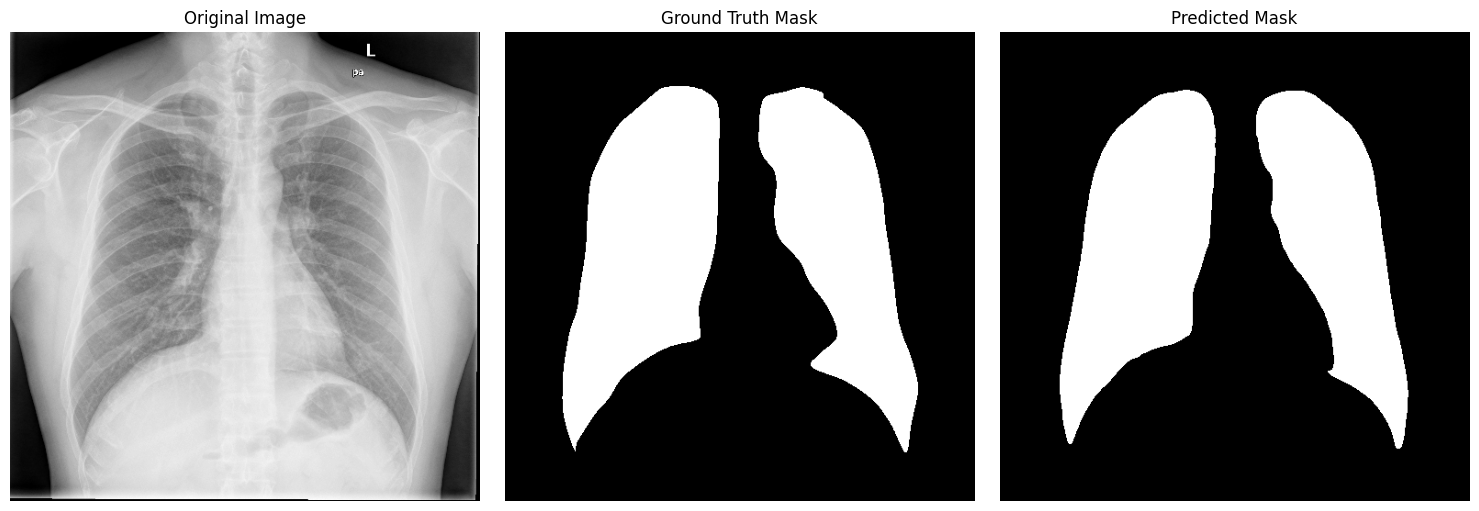

Accuracy: 0.9792
F1 Score: 0.9630


In [40]:
import numpy as np
import cv2
import os
import pywt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score
def load_and_preprocess_image(image_path, wavelet='db4', image_size=(512,512)):
    if not os.path.exists(image_path):
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image could not be loaded: {image_path}")

    img_resized = cv2.resize(img, image_size) / 255.0

    coeffs2 = pywt.dwt2(img_resized, wavelet)

    if coeffs2 is None or len(coeffs2) != 2:
        raise ValueError("Wavelet transformation failed to produce coefficients.")

    LL, (LH, HL, HH) = coeffs2

    LL = cv2.resize(LL, image_size)
    LH = cv2.resize(LH, image_size)
    HL = cv2.resize(HL, image_size)
    HH = cv2.resize(HH, image_size)

    wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)

    return img_resized, wavelet_image


# Load and preprocess the image
image_path = "/content/dataset/images/CHNCXR_0018_0.png"  # Replace with your actual image path
mask_path = "/content/dataset/masks/CHNCXR_0018_0.png" # Replace with your actual mask path



def load_ground_truth_mask(mask_path, image_size=(512, 512)):
    if not os.path.exists(mask_path):
        raise ValueError(f"Ground truth mask not found: {mask_path}")

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError(f"Ground truth mask could not be loaded: {mask_path}")

    mask_resized = cv2.resize(mask, image_size)
    # Ensure the mask is binary
    mask_binary = (mask_resized > 127).astype(np.uint8)
    return mask_binary

original_image, preprocessed_image = load_and_preprocess_image(image_path)
ground_truth_mask = load_ground_truth_mask(mask_path)

# Add a batch dimension for model prediction
preprocessed_image_batch = np.expand_dims(preprocessed_image, axis=0)

print(f"Preprocessed image shape: {preprocessed_image_batch.shape}")

# Make prediction
predicted_mask = model.predict(preprocessed_image_batch)

# Ensure the predicted mask is binary
predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(ground_truth_mask, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[1].axis('off')

axes[2].imshow(predicted_mask_binary[0, :, :, 0], cmap='gray')
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Calculate and print metrics
predicted_flat = predicted_mask_binary[0, :, :, 0].flatten()
ground_truth_flat = ground_truth_mask.flatten()

accuracy = accuracy_score(ground_truth_flat, predicted_flat)
f1 = f1_score(ground_truth_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Model input shape: (1, 512, 512, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


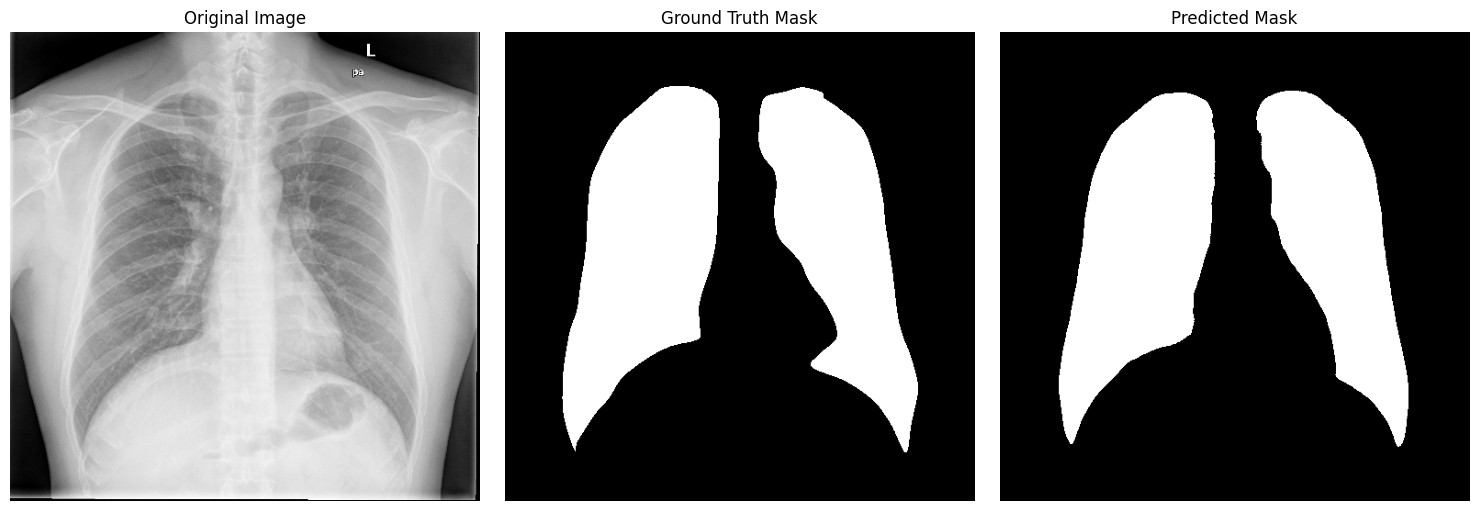

Accuracy: 0.9792
F1 Score: 0.9630


In [53]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

def load_and_preprocess_image_normal(image_path, image_size=(512, 512)):
    """
    Load and preprocess image for normal UNet with 3 channels
    """
    if not os.path.exists(image_path):
        raise ValueError(f"Image not found: {image_path}")

    # Read image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image could not be loaded: {image_path}")

    # Resize
    img_resized = cv2.resize(img, image_size)

    # Normalize
    img_normalized = img_resized / 255.0

    # Convert to 3 channels by repeating the grayscale channel
    img_3channel = np.stack([img_normalized] * 3, axis=-1)

    return img_resized / 255.0, img_3channel  # Return both for visualization

def load_ground_truth_mask(mask_path, image_size=(512, 512)):
    if not os.path.exists(mask_path):
        raise ValueError(f"Ground truth mask not found: {mask_path}")

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError(f"Ground truth mask could not be loaded: {mask_path}")

    mask_resized = cv2.resize(mask, image_size)
    # Ensure the mask is binary
    mask_binary = (mask_resized > 127).astype(np.uint8)
    return mask_binary

def evaluate_normal_unet(model, image_path, mask_path):
    """
    Evaluate normal UNet model on a single image
    """
    # Load and preprocess image
    original_image, model_input_image = load_and_preprocess_image_normal(image_path)
    ground_truth_mask = load_ground_truth_mask(mask_path)

    # Add batch dimension
    model_input = np.expand_dims(model_input_image, axis=0)

    print(f"Model input shape: {model_input.shape}")

    # Make prediction
    predicted_mask = model.predict(model_input)

    # Ensure the predicted mask is binary
    predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(ground_truth_mask, cmap='gray')
    axes[1].set_title('Ground Truth Mask')
    axes[1].axis('off')

    axes[2].imshow(predicted_mask_binary[0, :, :, 0], cmap='gray')
    axes[2].set_title('Predicted Mask')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    # Calculate metrics
    predicted_flat = predicted_mask_binary[0, :, :, 0].flatten()
    ground_truth_flat = ground_truth_mask.flatten()

    accuracy = accuracy_score(ground_truth_flat, predicted_flat)
    f1 = f1_score(ground_truth_flat, predicted_flat)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return accuracy, f1, predicted_mask_binary

# Example usage

# Load your normal UNet model
#normal_unet_model = tf.keras.models.load_model('path_to_normal_unet_model.h5')

# Specify paths
image_path = "/content/dataset/images/CHNCXR_0018_0.png"
mask_path = "/content/dataset/masks/CHNCXR_0018_0.png"

# Evaluate
accuracy, f1, predicted_mask = evaluate_normal_unet(normal_unet_model, image_path, mask_path)

In [59]:
import numpy as np
import cv2
import os
from glob import glob
import tensorflow as tf
from sklearn.metrics import jaccard_score, f1_score, precision_score, recall_score, accuracy_score

class TestDataGenerator:
    def __init__(self, image_path, mask_path, image_size=(512, 512)):
        self.image_path = image_path
        self.mask_path = mask_path
        self.image_size = image_size

        # Load and sort the file paths
        self.image_files = sorted(glob(os.path.join(image_path, "*.png")))
        self.mask_files = sorted(glob(os.path.join(mask_path, "*.png")))

        # Verify matching numbers of images and masks
        assert len(self.image_files) == len(self.mask_files), \
            "Number of test images and masks do not match"

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load image
        img = cv2.imread(self.image_files[idx], cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.image_size)
        img = img / 255.0  # Normalize to [0,1]

        # Convert to 3 channels for normal UNet
        img_3channel = np.stack([img] * 3, axis=-1)

        # Load mask
        mask = cv2.imread(self.mask_files[idx], cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, self.image_size)
        mask = (mask > 127).astype(np.uint8)  # Ensure binary mask

        # Add channel dimensions
        img_3channel = np.expand_dims(img_3channel, axis=0)    # Add batch dimension
        mask = np.expand_dims(mask, axis=-1)  # Add channel dimension
        mask = np.expand_dims(mask, axis=0)   # Add batch dimension

        return img_3channel, mask

class WaveletTestDataGenerator:
    def __init__(self, image_path, mask_path, image_size=(512, 512), wavelet='db4'):
        self.image_path = image_path
        self.mask_path = mask_path
        self.image_size = image_size
        self.wavelet = wavelet

        self.image_files = sorted(glob(os.path.join(image_path, "*.png")))
        self.mask_files = sorted(glob(os.path.join(mask_path, "*.png")))

        assert len(self.image_files) == len(self.mask_files), \
            "Number of test images and masks do not match"

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load and preprocess image with wavelets
        img = cv2.imread(self.image_files[idx], cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.image_size)
        img = img / 255.0

        # Wavelet transform
        coeffs2 = pywt.dwt2(img, self.wavelet)
        LL, (LH, HL, HH) = coeffs2

        # Resize wavelet components
        LL = cv2.resize(LL, self.image_size)
        LH = cv2.resize(LH, self.image_size)
        HL = cv2.resize(HL, self.image_size)
        HH = cv2.resize(HH, self.image_size)

        # Stack wavelet components
        wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)

        # Load mask
        mask = cv2.imread(self.mask_files[idx], cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, self.image_size)
        mask = (mask > 127).astype(np.uint8)

        # Add dimensions
        wavelet_image = np.expand_dims(wavelet_image, axis=0)
        mask = np.expand_dims(mask, axis=-1)
        mask = np.expand_dims(mask, axis=0)

        return wavelet_image, mask

def compute_all_metrics(model, data_gen, batch_size=8):
    """
    Compute all metrics for segmentation results
    """
    metrics = {
        'iou_scores': [],
        'dice_scores': [],
        'accuracy_scores': [],
        'precision_scores': [],
        'recall_scores': [],
        'f1_scores': []
    }

    for i in range(len(data_gen)):
        print(f"Processing image {i+1}/{len(data_gen)}")

        image, mask = data_gen[i]
        pred = model.predict(image)

        # Ensure binary masks
        pred = (pred > 0.5).astype(np.uint8)
        mask = (mask > 0.5).astype(np.uint8)

        # Flatten masks for metric calculation
        pred_flat = pred[0, :, :, 0].flatten()
        mask_flat = mask[0, :, :, 0].flatten()

        # Calculate all metrics
        metrics['iou_scores'].append(jaccard_score(mask_flat, pred_flat))
        metrics['dice_scores'].append(f1_score(mask_flat, pred_flat))
        metrics['accuracy_scores'].append(accuracy_score(mask_flat, pred_flat))
        metrics['precision_scores'].append(precision_score(mask_flat, pred_flat))
        metrics['recall_scores'].append(recall_score(mask_flat, pred_flat))
        metrics['f1_scores'].append(f1_score(mask_flat, pred_flat))

    # Calculate means and standard deviations
    results = {}
    for metric_name, scores in metrics.items():
        results[f'mean_{metric_name}'] = np.mean(scores)
        results[f'std_{metric_name}'] = np.std(scores)

    return results

def evaluate_models(normal_unet, wavelet_unet, test_data_gen, wavelet_test_data_gen):
    """
    Evaluate both UNet models and compare their metrics
    """
    print("Evaluating Normal UNet...")
    normal_metrics = compute_all_metrics(normal_unet, test_data_gen)

    print("\nEvaluating Wavelet UNet...")
    wavelet_metrics = compute_all_metrics(wavelet_unet, wavelet_test_data_gen)

    # Print comparison
    print("\nMetrics Comparison:")
    print(f"{'Metric':20} {'Normal UNet':15} {'Wavelet UNet':15}")
    print("-" * 50)

    for metric in ['iou_scores', 'dice_scores', 'accuracy_scores',
                  'precision_scores', 'recall_scores', 'f1_scores']:
        normal_mean = normal_metrics[f'mean_{metric}']
        wavelet_mean = wavelet_metrics[f'mean_{metric}']
        print(f"{metric:20} {normal_mean:.4f} ± {normal_metrics[f'std_{metric}']:.4f}"
              f"    {wavelet_mean:.4f} ± {wavelet_metrics[f'std_{metric}']:.4f}")

    return normal_metrics, wavelet_metrics

In [60]:
# For Normal UNet
test_data_gen = TestDataGenerator(TEST_IMAGE_PATH, TEST_MASK_PATH)
# For Wavelet UNet
wavelet_test_data_gen = TestWaveletDataGenerator(TEST_IMAGE_PATH, TEST_MASK_PATH)

In [61]:
normal_metrics, wavelet_metrics = evaluate_models(normal_unet_model,
                                                model,#model= waveletted_unet_model
                                                test_data_gen,
                                                wavelet_test_data_gen)

Evaluating Normal UNet...
Processing image 1/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
Processing image 2/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 3/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 4/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 5/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 6/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 7/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing image 8/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processing image 9/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing image 10/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Processing image 11/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Processing image 12/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processing image 13/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Processing image 14/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing image 15/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing image 16/140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

**Side By Side Comparision**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


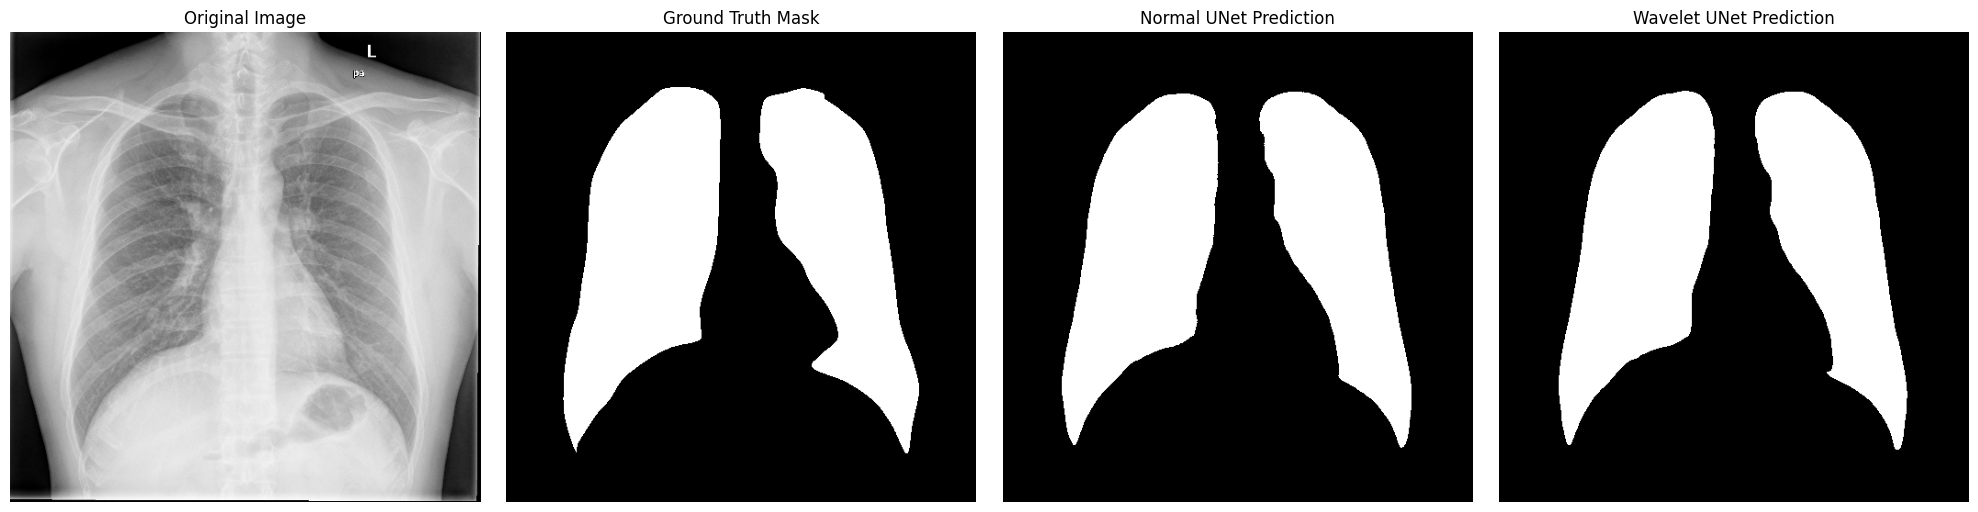


Metrics Comparison:
------------------------------------------------------------
Metric          Normal UNet     Wavelet UNet   
------------------------------------------------------------
Accuracy                0.9792         0.9792
F1 Score                0.9630         0.9630
IoU                     0.9286         0.9287
Precision               0.9923         0.9951
Recall                  0.9353         0.9329


In [63]:
import numpy as np
import cv2
import os
import pywt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score

def compare_models_on_image(normal_unet_model, wavelet_unet_model, image_path, mask_path,
                          image_size=(512, 512), wavelet='db4'):
    """
    Compare normal UNet and wavelet UNet predictions on a single image
    """
    # Load and preprocess image for normal UNet
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image could not be loaded: {image_path}")

    img_resized = cv2.resize(img, image_size)
    img_normalized = img_resized / 255.0

    # Create 3-channel input for normal UNet
    img_3channel = np.stack([img_normalized] * 3, axis=-1)
    normal_input = np.expand_dims(img_3channel, axis=0)

    # Create wavelet input
    coeffs2 = pywt.dwt2(img_normalized, wavelet)
    LL, (LH, HL, HH) = coeffs2

    LL = cv2.resize(LL, image_size)
    LH = cv2.resize(LH, image_size)
    HL = cv2.resize(HL, image_size)
    HH = cv2.resize(HH, image_size)

    wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)
    wavelet_input = np.expand_dims(wavelet_image, axis=0)

    # Load ground truth mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, image_size)
    ground_truth = (mask > 127).astype(np.uint8)

    # Get predictions from both models
    normal_pred = normal_unet_model.predict(normal_input)
    wavelet_pred = wavelet_unet_model.predict(wavelet_input)

    # Convert predictions to binary masks
    normal_mask = (normal_pred > 0.5).astype(np.uint8)[0, :, :, 0]
    wavelet_mask = (wavelet_pred > 0.5).astype(np.uint8)[0, :, :, 0]

    # Calculate metrics
    metrics = {}
    for name, pred_mask in [("Normal UNet", normal_mask), ("Wavelet UNet", wavelet_mask)]:
        pred_flat = pred_mask.flatten()
        gt_flat = ground_truth.flatten()

        metrics[name] = {
            'Accuracy': accuracy_score(gt_flat, pred_flat),
            'F1 Score': f1_score(gt_flat, pred_flat),
            'IoU': jaccard_score(gt_flat, pred_flat),
            'Precision': precision_score(gt_flat, pred_flat),
            'Recall': recall_score(gt_flat, pred_flat)
        }

    # Plotting
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # Original image
    axes[0].imshow(img_normalized, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Ground truth
    axes[1].imshow(ground_truth, cmap='gray')
    axes[1].set_title('Ground Truth Mask')
    axes[1].axis('off')

    # Normal UNet prediction
    axes[2].imshow(normal_mask, cmap='gray')
    axes[2].set_title('Normal UNet Prediction')
    axes[2].axis('off')

    # Wavelet UNet prediction
    axes[3].imshow(wavelet_mask, cmap='gray')
    axes[3].set_title('Wavelet UNet Prediction')
    axes[3].axis('off')

    plt.tight_layout()
    plt.show()

    # Print metrics
    print("\nMetrics Comparison:")
    print("-" * 60)
    print(f"{'Metric':<15} {'Normal UNet':<15} {'Wavelet UNet':<15}")
    print("-" * 60)

    for metric in ['Accuracy', 'F1 Score', 'IoU', 'Precision', 'Recall']:
        normal_value = metrics['Normal UNet'][metric]
        wavelet_value = metrics['Wavelet UNet'][metric]
        print(f"{metric:<15} {normal_value:>14.4f} {wavelet_value:>14.4f}")

    return metrics

# Specify image paths
image_path = "/content/dataset/images/CHNCXR_0018_0.png"
mask_path = "/content/dataset/masks/CHNCXR_0018_0.png"

wavelet_unet_model=model
# Compare models
metrics = compare_models_on_image(normal_unet_model, wavelet_unet_model,
                                image_path, mask_path)